## Micro-resonator & waveguide coupling

### Example 1
- Device: ring
- Coupler: pulley

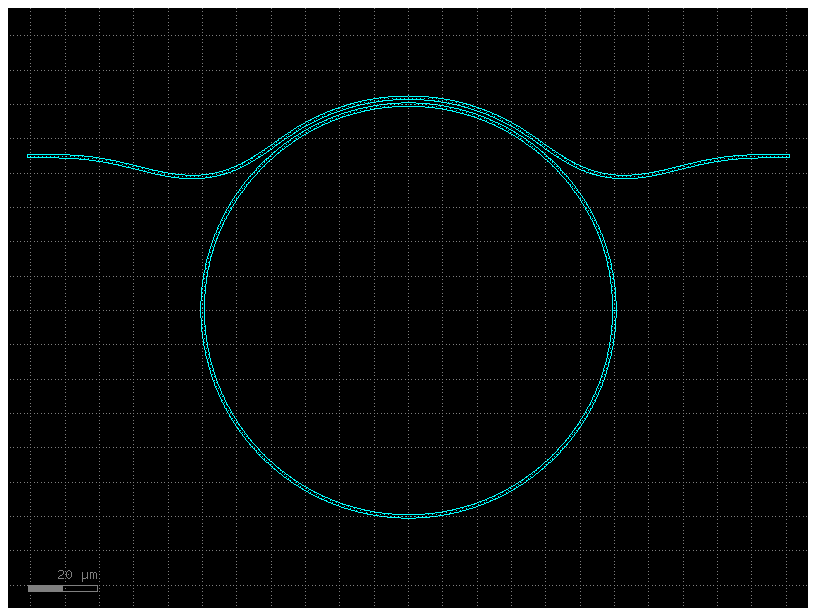

In [2]:
from gdslayout.structure import Structure

structure = Structure(config_path="./config_example/1.yaml")
component = structure.build()
component.plot()

#### We can check the device and coupler separately.
Check the device

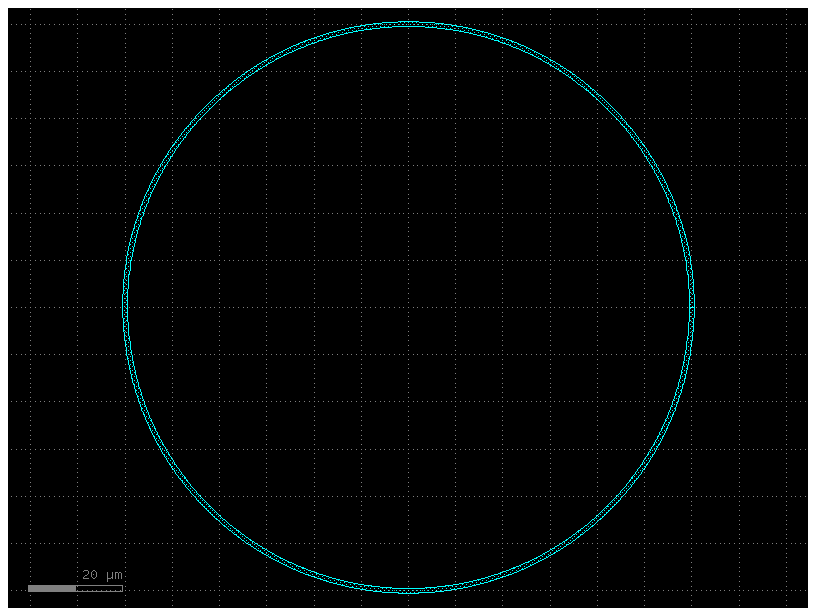

In [ ]:
device, device_path = structure._load_device()
device.plot()

Check the device's curvature

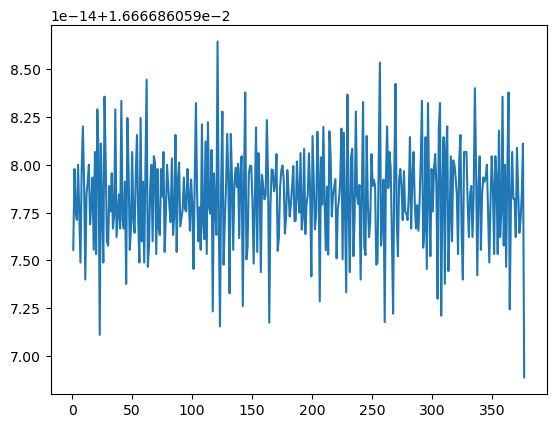

In [ ]:
curvature = device_path.curvature()
import matplotlib.pyplot as plt
plt.plot(curvature[0], curvature[1], label='Curvature')

Check the coupler

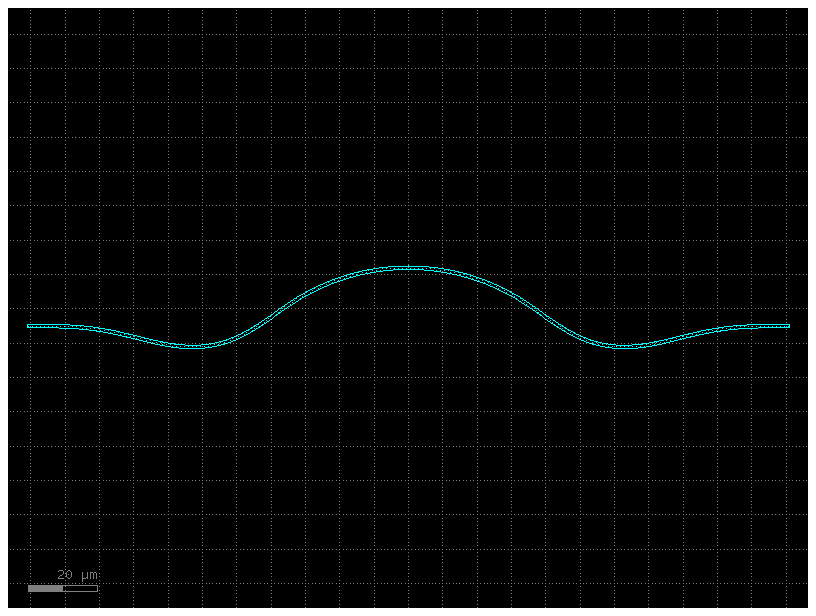

In [ ]:
coupler, coupler_path = structure._load_coupler()
coupler.plot()

Check the coupler's curvature

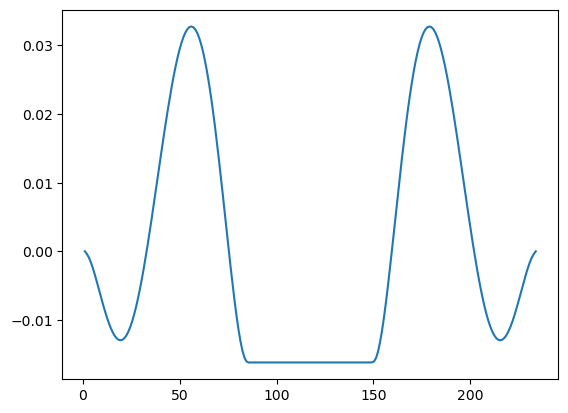

In [ ]:
curvature = coupler_path.curvature()
import matplotlib.pyplot as plt
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the device's ports

┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center      ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 60.5) │ optical   │
└─────────┴───────┴─────────────┴───────────────┴─────────────┴───────────┘

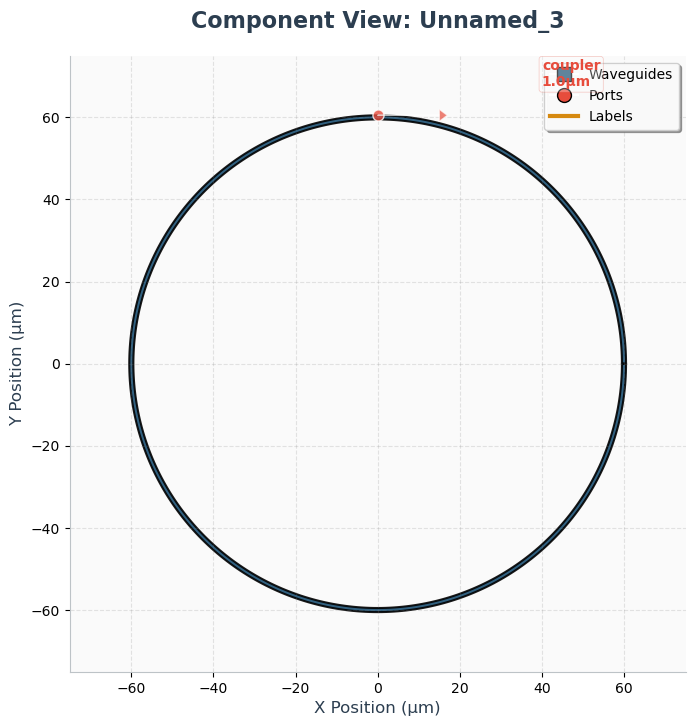

In [ ]:
from gdslayout.visualization import plot_component
device.pprint_ports()
fig, ax = plot_component(device, with_ports=True, with_labels=True, figsize=(10, 8))

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation           ┃ layer         ┃ center                              ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0                   │ SLAB150 (2/0) │ (0.0, 60.5)                         │ optical   │
│ in            │ 1.0   │ 179.99928559630337    │ SLAB150 (2/0) │ (-111.0, 45.0)                      │ optical   │
│ out           │ 1.0   │ 0.0007144036906345265 │ SLAB150 (2/0) │ (111.00000000000034,                │ optical   │
│               │       │                       │               │ 44.99999999999996)                  │           │
│ device_center │ 1.0   │ 0.0                   │ SLAB150 (2/0) │ (0.0, 0.0)                          │ optical   │
└───────────────┴───────┴───────────────────────┴───────────────┴─────────────────────────────────────┴───────────┘

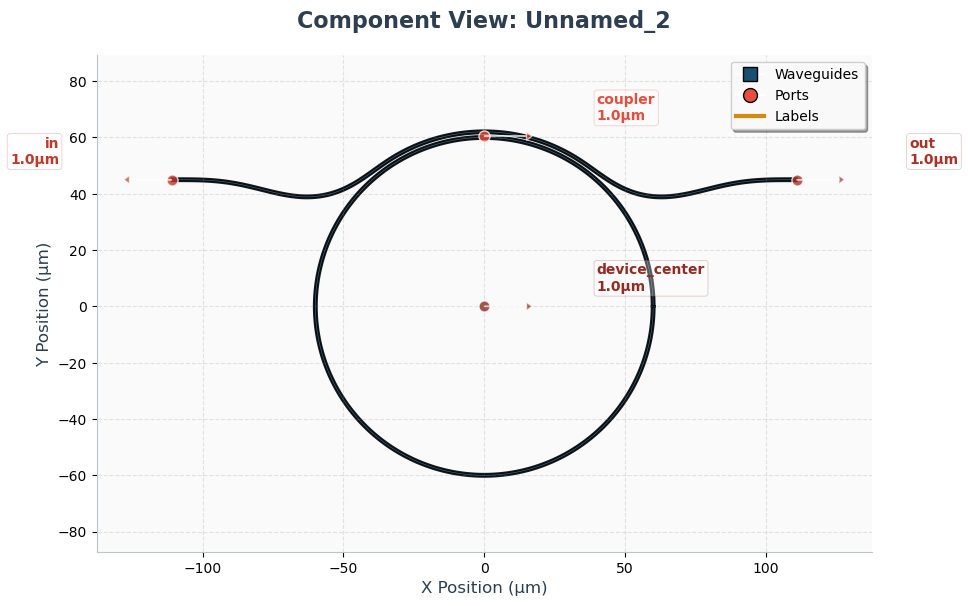

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

#### Lumerical FDTD simulation
For lumerical FDTD simulation, we need to define the coupling region and ports info.

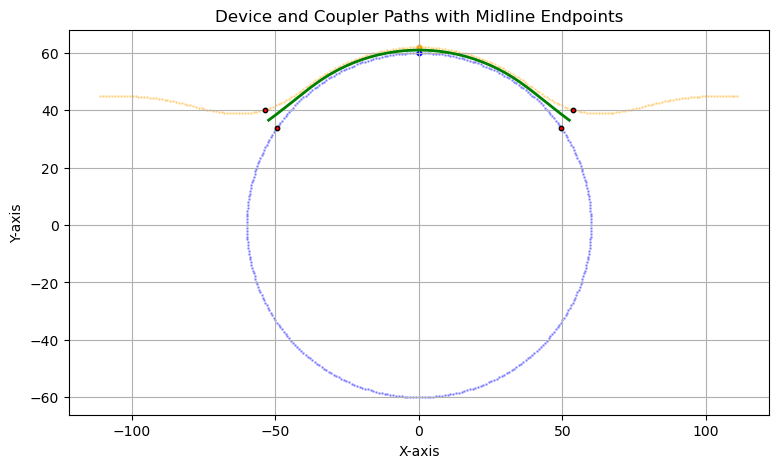

In [ ]:
ax = structure.lumerical(decoupling_width=4.0, auto_compute=True, plot=True)

### Example 2

- Device: ring
- Coupler: pulley (with ring_down)

Used to place multiple components in one cluster by specifying their waveguides bending horizontal and vertical spans.

Definition
```
# ring_down is a 2‑element list:
ring_down: List = [horizontal_span, vertical_span]
```
 - horizontal_span (l): the width of the cluster
 - vertical_span (d): the vertical offset of the cluster

Horizontal_span:
| Code         | Meaning                   | Computation                                                  |
| ------------ | ------------------------- | ------------------------------------------------------------ |
| `r:<ratio>`  | Relative to device width | `l = ring_down_device.xsize * ratio` |

Vertical_span:

| Code         | Meaning                   | Computation                                                  |
| ------------ | ------------------------- | ------------------------------------------------------------ |
| `m`          | Middle                    | `d = -ring_down_device.y`                                    |
| `b`          | Top                       | `d = -ring_down_device.ymin`                                 |
| `t`          | Bottom                    | `d = -ring_down_device.ymax`                                 |
| `b:<offset>` | Top plus offset           | `d = -ring_down_device.ymin - offset`                        |
| `t:<offset>` | Bottom plus offset        | `d = -ring_down_device.ymax - offset`                        |
| `m:<offset>` | Middle plus offset        | `d = -ring_down_device.y - offset`  *(positive direction)*    |
| `r:<ratio>`  | Relative to device height | `d = -ring_down_device.ymax + ring_down_device.ysize * ratio` |

Note: In case of the vertical span, 't' equals 'r: 0', 'm' equals 'r: 0.5', 'b' equals 'r: 1'.

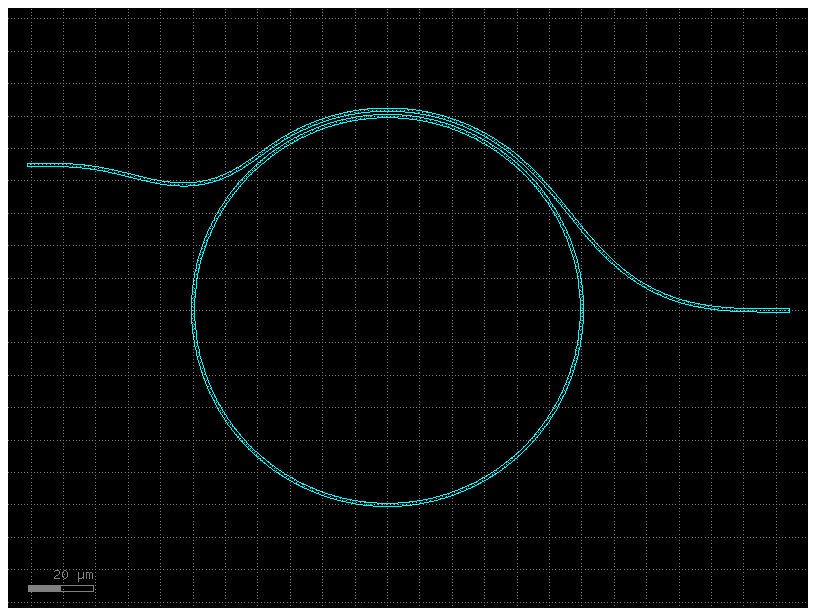

In [ ]:
structure = Structure(config_path="./config_example/2.yaml")
component = structure.build()
component.plot()

Check the coupler's curvature

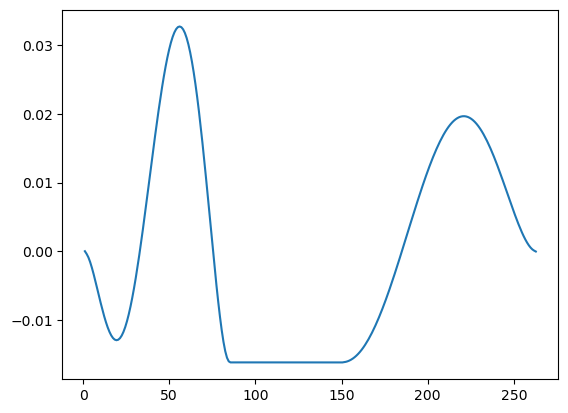

In [ ]:
coupler, coupler_path = structure._load_coupler()
curvature = coupler_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation        ┃ layer         ┃ center                                 ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0                │ SLAB150 (2/0) │ (0.0, 60.5)                            │ optical   │
│ in            │ 1.0   │ 179.99928559630337 │ SLAB150 (2/0) │ (-111.0, 45.0)                         │ optical   │
│ out           │ 1.0   │ 359.99976764471745 │ SLAB150 (2/0) │ (124.17000000107214,                   │ optical   │
│               │       │                    │               │ 9.289777835874702e-10)                 │           │
│ device_center │ 1.0   │ 0.0                │ SLAB150 (2/0) │ (0.0, 0.0)                             │ optical   │
└───────────────┴───────┴────────────────────┴───────────────┴────────────────────────────────────────┴───────────┘

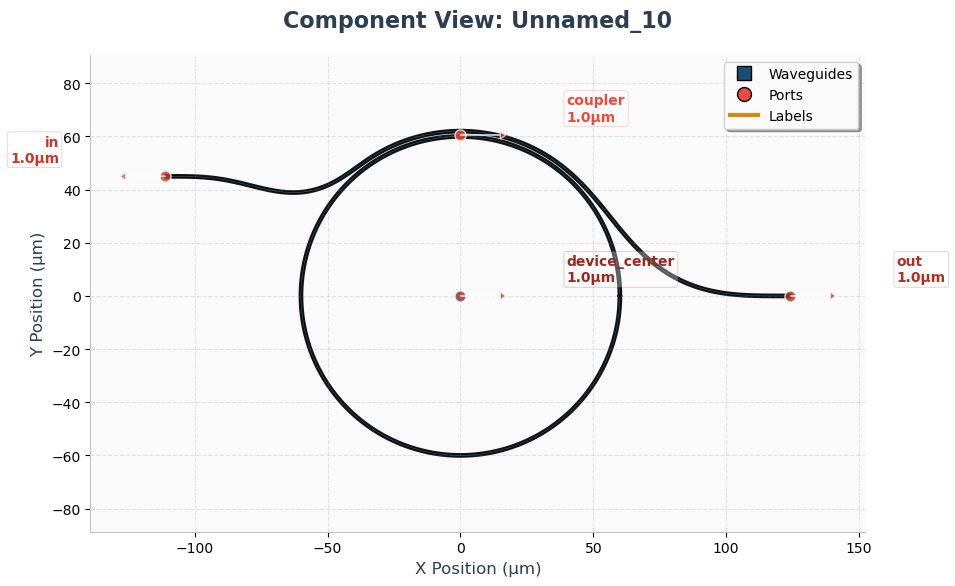

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

#### Lumerical FDTD simulation
For lumerical FDTD simulation, we need to define the coupling region and ports info.

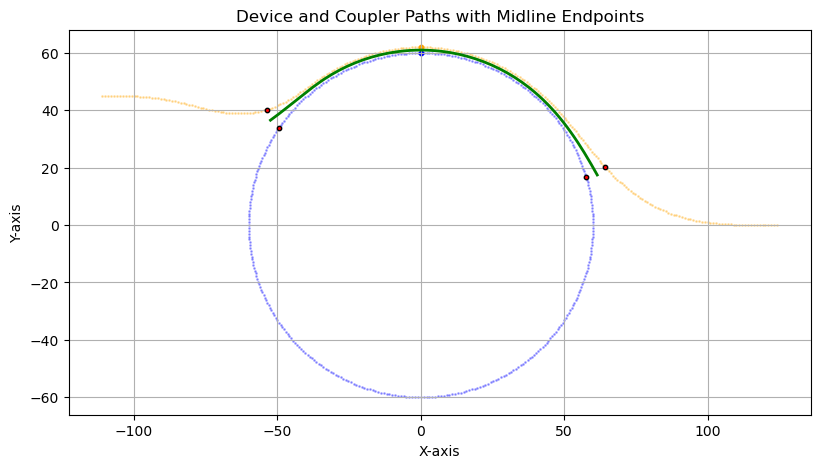

In [ ]:
ax = structure.lumerical(decoupling_width=4.0, auto_compute=True, plot=True)

### Example 3
- Device: ring
- Coupler: point

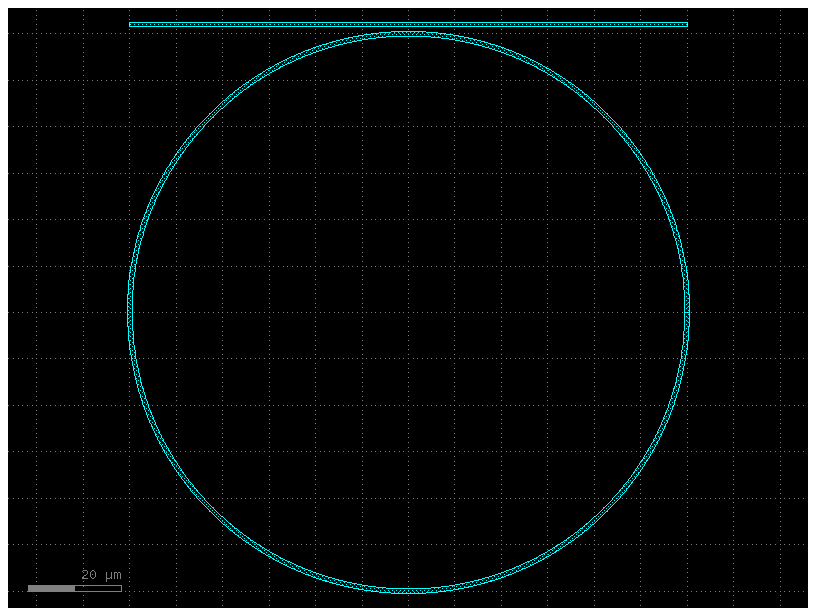

In [ ]:
structure = Structure(config_path="./config_example/3.yaml")
component = structure.build()
component.plot()

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation ┃ layer         ┃ center        ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 60.5)   │ optical   │
│ in            │ 1.0   │ 180.0       │ SLAB150 (2/0) │ (-60.0, 62.0) │ optical   │
│ out           │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (60.0, 62.0)  │ optical   │
│ device_center │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 0.0)    │ optical   │
└───────────────┴───────┴─────────────┴───────────────┴───────────────┴───────────┘

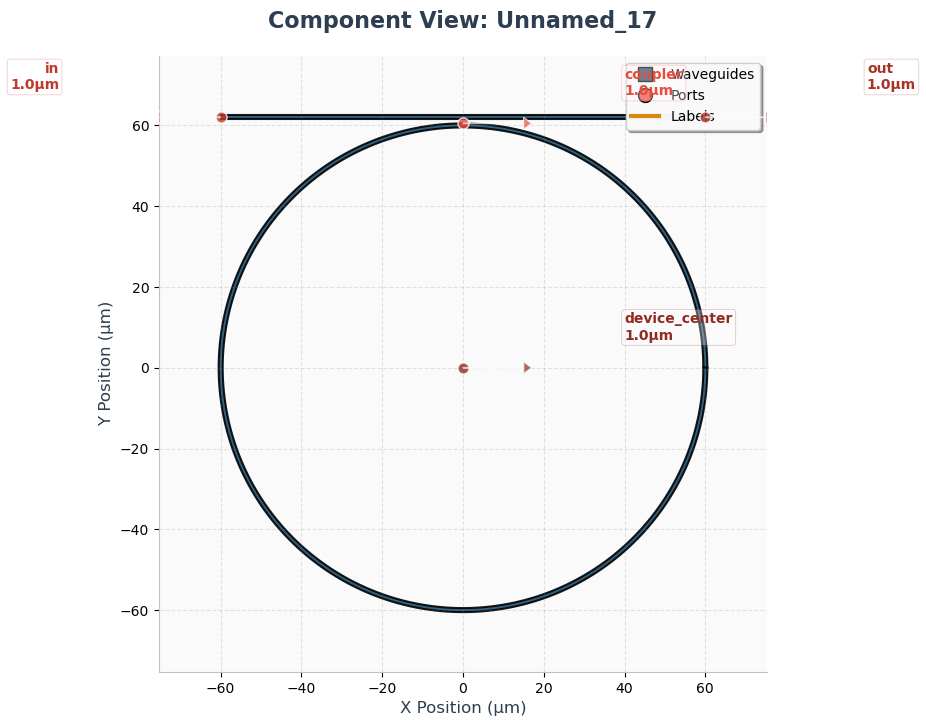

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

### Example 4
- Device: ring
- Coupler: point (with ring_down)

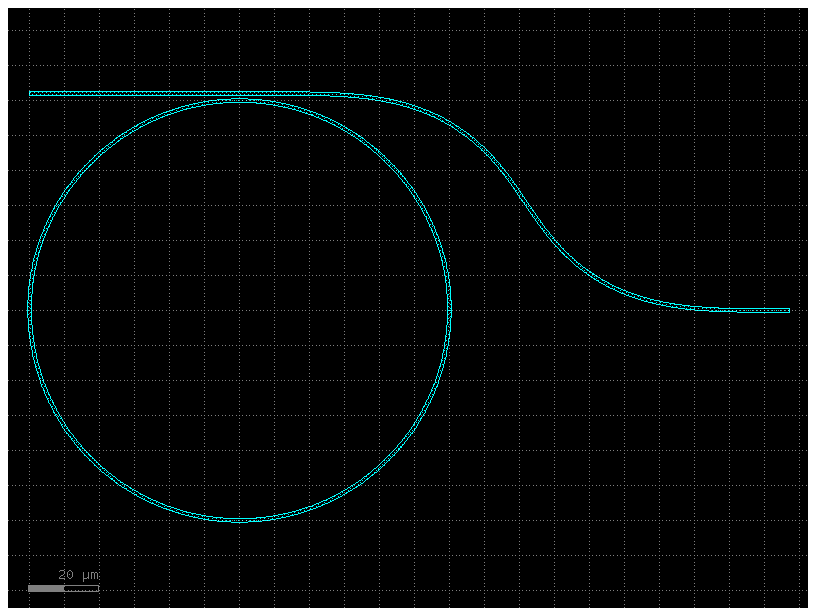

In [ ]:
structure = Structure(config_path="./config_example/4.yaml")
component = structure.build()
component.plot()

Check the coupler's curvature

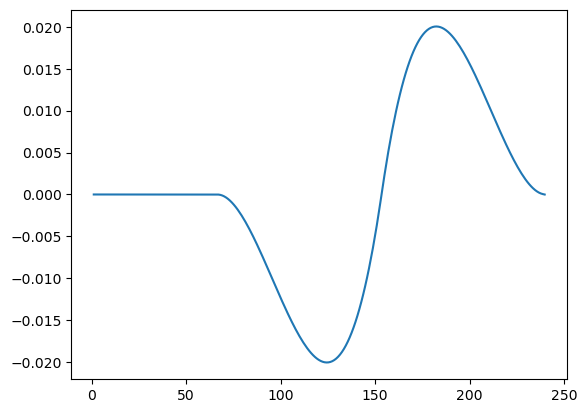

In [ ]:
coupler, coupler_path = structure._load_coupler()
curvature = coupler_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation ┃ layer         ┃ center                                       ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 60.5)                                  │ optical   │
│ in            │ 1.0   │ 180.0       │ SLAB150 (2/0) │ (-60.0, 62.0)                                │ optical   │
│ out           │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (157.25009820101872, 0.00023956353502541106) │ optical   │
│ device_center │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 0.0)                                   │ optical   │
└───────────────┴───────┴─────────────┴───────────────┴──────────────────────────────────────────────┴───────────┘

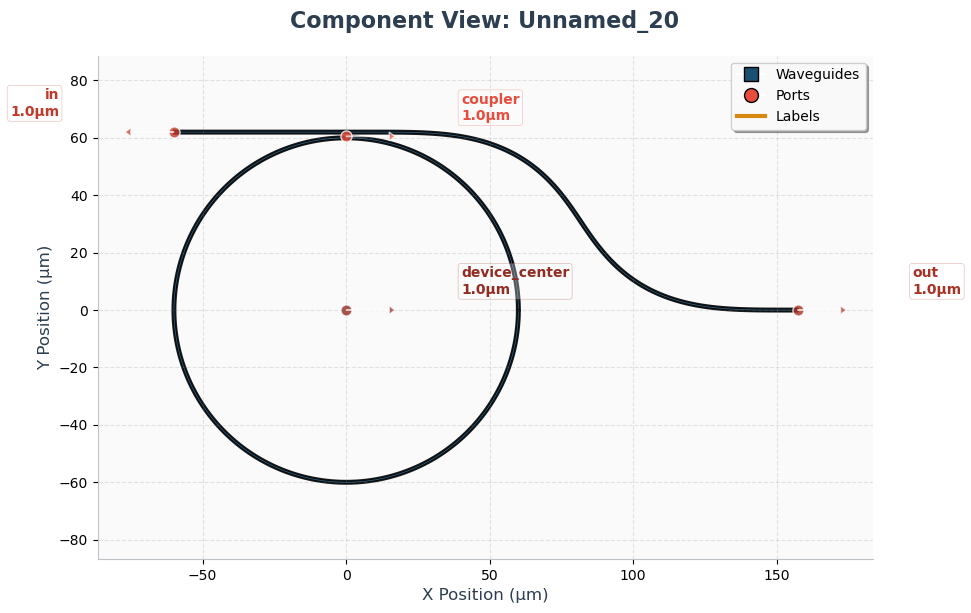

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

### Example 5
- Device: ring
- Coupler: out_point (with ring_down)

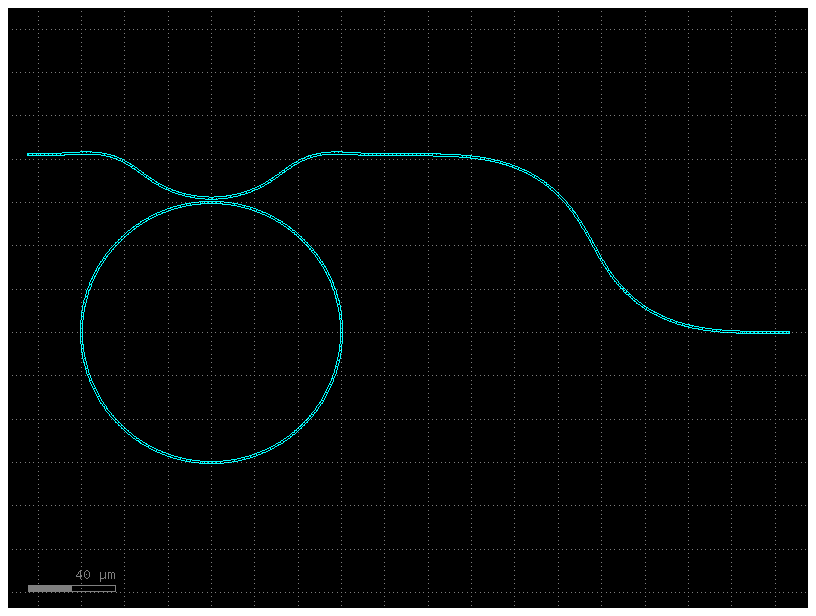

In [ ]:
structure = Structure(config_path="./config_example/5.yaml")
component = structure.build()
component.plot()

Check the coupler's curvature

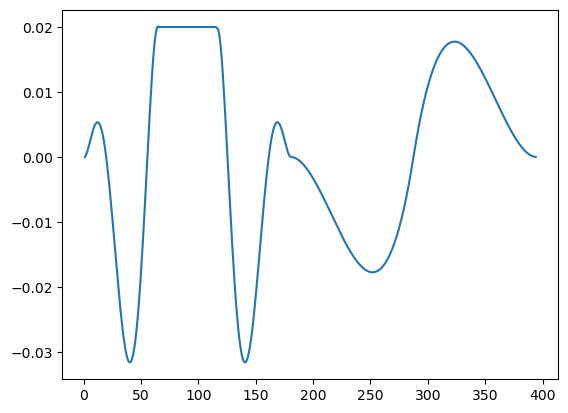

In [ ]:
coupler, coupler_path = structure._load_coupler()
curvature = coupler_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation        ┃ layer         ┃ center                                 ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0                │ SLAB150 (2/0) │ (0.0, 60.5)                            │ optical   │
│ in            │ 1.0   │ 180.00076540687326 │ SLAB150 (2/0) │ (-85.0, 82.0)                          │ optical   │
│ out           │ 1.0   │ 359.99923459315426 │ SLAB150 (2/0) │ (266.4989778185359,                    │ optical   │
│               │       │                    │               │ -0.002262473825069833)                 │           │
│ device_center │ 1.0   │ 0.0                │ SLAB150 (2/0) │ (0.0, 0.0)                             │ optical   │
└───────────────┴───────┴────────────────────┴───────────────┴────────────────────────────────────────┴───────────┘

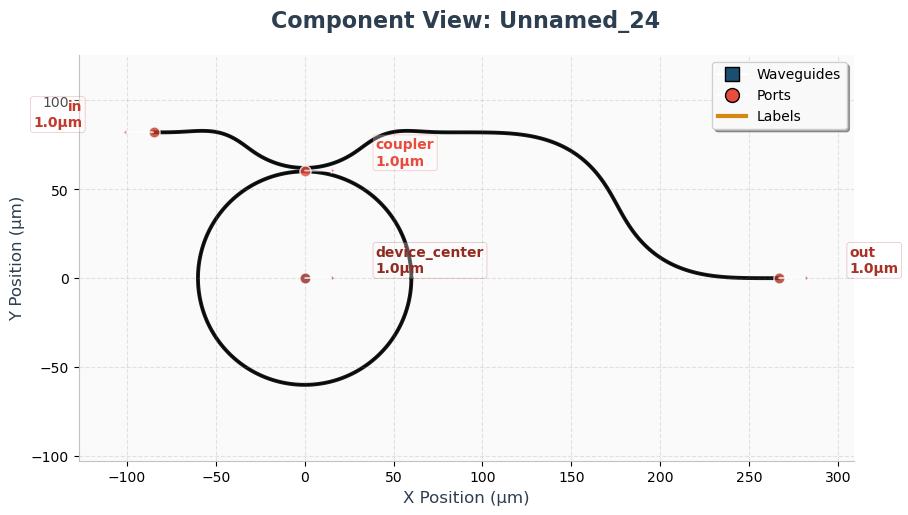

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

### Example 6
- Device: racetrack
- Coupler: out_point (with ring_down)

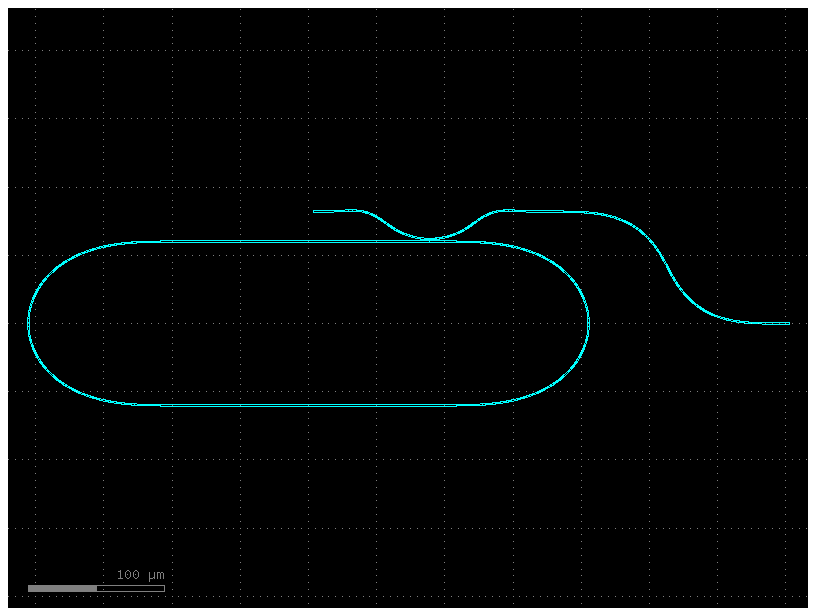

In [ ]:
structure = Structure(config_path="./config_example/6.yaml")
component = structure.build()
component.plot()

Check the device's curvature

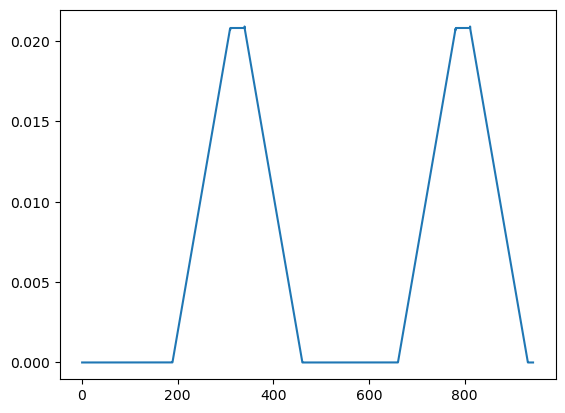

In [ ]:
device, device_path = structure._load_device()
curvature = device_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

Check the coupler's curvature

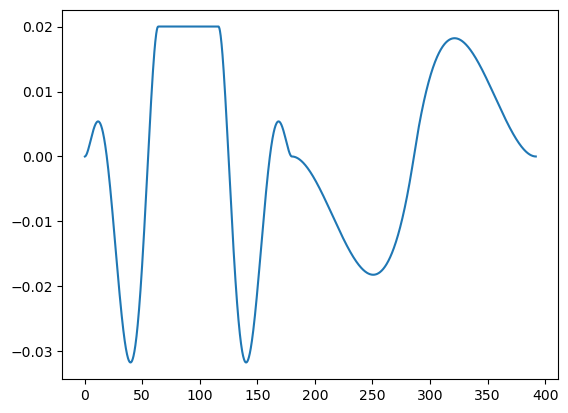

In [ ]:
coupler, coupler_path = structure._load_coupler()
curvature = coupler_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the device's ports

┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center                    ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (88.98898898898898, 60.5) │ optical   │
└─────────┴───────┴─────────────┴───────────────┴───────────────────────────┴───────────┘

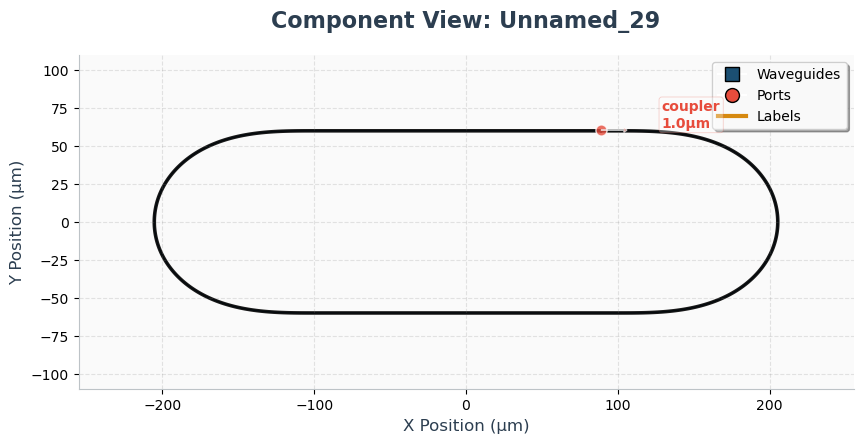

In [ ]:
from gdslayout.visualization import plot_component
device.pprint_ports()
fig, ax = plot_component(device, with_ports=True, with_labels=True, figsize=(10, 8))

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation       ┃ layer         ┃ center                                  ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0               │ SLAB150 (2/0) │ (88.98898898898898, 60.5)               │ optical   │
│ in            │ 1.0   │ 180.0000059761261 │ SLAB150 (2/0) │ (3.9889889889889787, 82.0)              │ optical   │
│ out           │ 1.0   │ 359.9999940239101 │ SLAB150 (2/0) │ (352.69108504003066,                    │ optical   │
│               │       │                   │               │ -1.7323124666290823e-05)                │           │
│ device_center │ 1.0   │ 0.0               │ SLAB150 (2/0) │ (0.0, 0.0)                              │ optical   │
└───────────────┴───────┴───────────────────┴───────────────┴─────────────────────────────────────────┴───────────┘

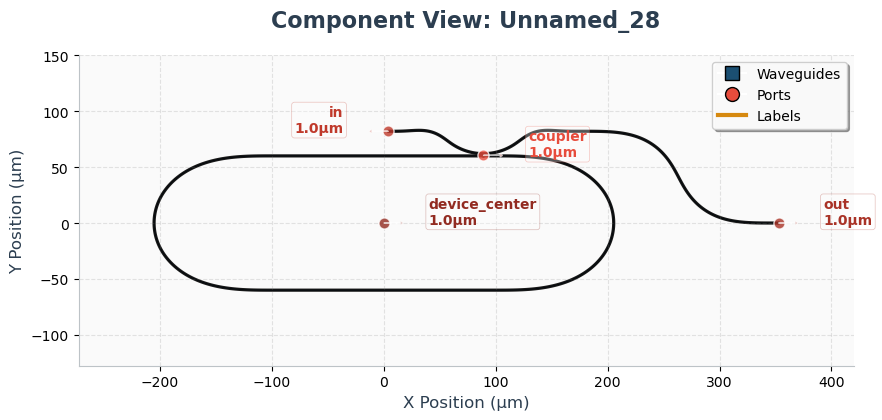

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

### Example 7
- Device: spiral
- Coupler: out_point (with ring_down)

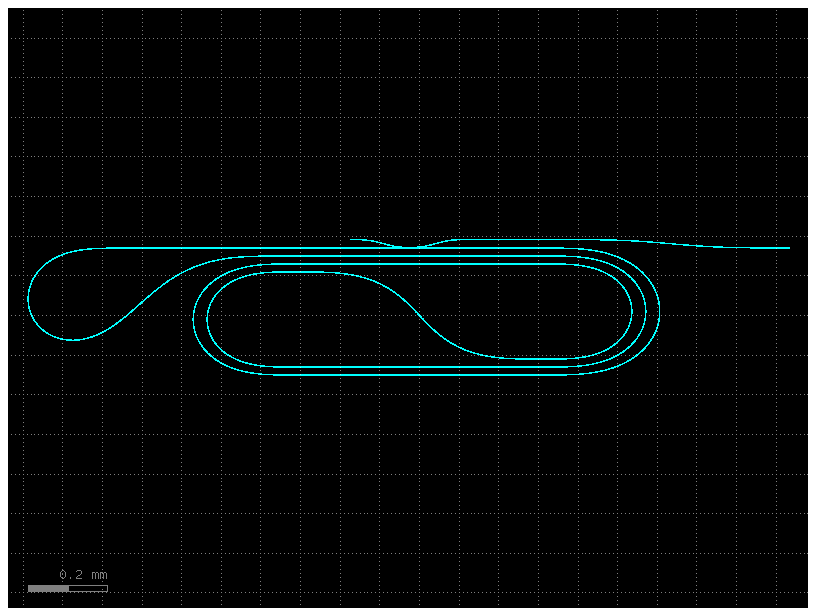

In [ ]:
structure = Structure(config_path="./config_example/7.yaml")
component = structure.build()
component.plot()

Check the device's curvature

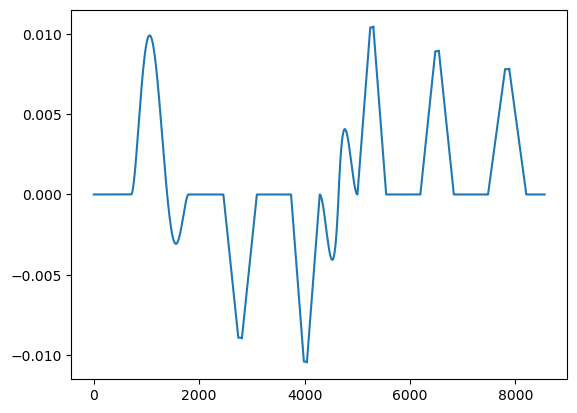

In [ ]:
device, device_path = structure._load_device()
curvature = device_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

Check the coupler's curvature

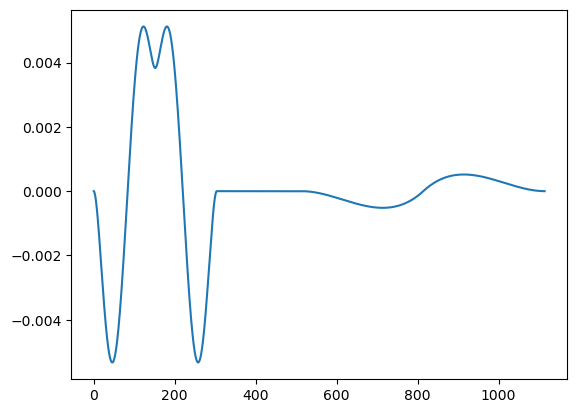

In [ ]:
coupler, coupler_path = structure._load_coupler()
curvature = coupler_path.curvature()
plt.plot(curvature[0], curvature[1], label='Curvature')

#### Show the device's ports

┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center                      ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (-25.26943802925325, 170.5) │ optical   │
└─────────┴───────┴─────────────┴───────────────┴─────────────────────────────┴───────────┘

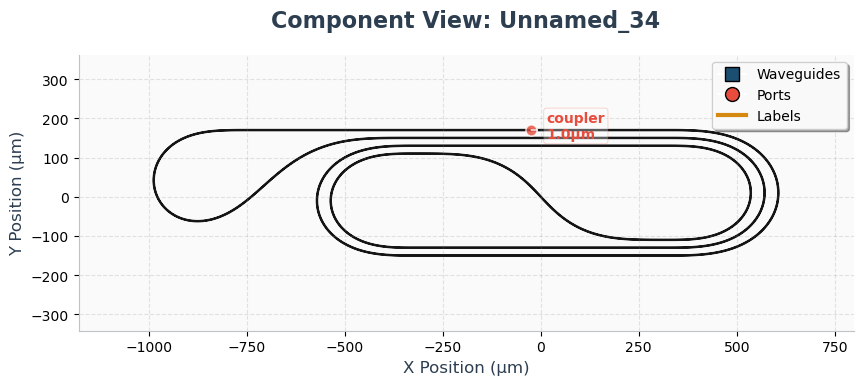

In [ ]:
from gdslayout.visualization import plot_component
device.pprint_ports()
fig, ax = plot_component(device, with_ports=True, with_labels=True, figsize=(10, 8))

#### Show the component's ports

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation           ┃ layer         ┃ center                              ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0                   │ SLAB150 (2/0) │ (-25.26943802925325, 170.5)         │ optical   │
│ in            │ 1.0   │ 179.99999342605923    │ SLAB150 (2/0) │ (-175.26943802925325, 191.5)        │ optical   │
│ out           │ 1.0   │ 6.571380243502401e-06 │ SLAB150 (2/0) │ (934.1873643849275,                 │ optical   │
│               │       │                       │               │ 170.50009302398985)                 │           │
│ device_center │ 1.0   │ 0.0                   │ SLAB150 (2/0) │ (-190.64299999999992, 10.0)         │ optical   │
└───────────────┴───────┴───────────────────────┴───────────────┴─────────────────────────────────────┴───────────┘

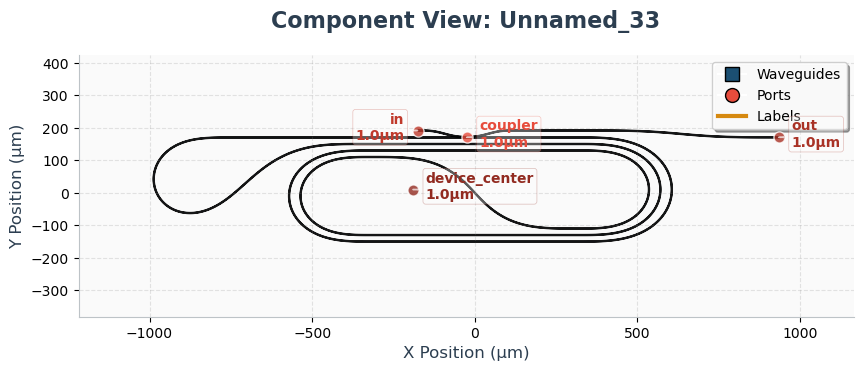

In [ ]:
from gdslayout.visualization import plot_component
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

In [ ]:
structure.create_gds('./gds/7.gds')

'./gds/7.gds'